In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

# Convert numpy or list int TensorFlow Data 

In [24]:
# numpy array를 TensorFlow data object로 만들기
train_x = np.arange(300).astype(np.float32).reshape(-1,1)
train_y = 3*train_x + 1

#from_tensor_slices를 사용하면 numpy,python list에 있는 data를 바로 tensorflow의 dataset object로 만들어 낸다 
train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y)) #x,y pair
train_ds = train_ds.shuffle(100).batch(32) # shuffle for 100 times and make mini-batch of 32 

for x,y in train_ds:
    print(x.shape,"\t",y.shape,"\n")

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(32, 1) 	 (32, 1) 

(12, 1) 	 (12, 1) 



In [29]:
from tensorflow.keras.datasets import mnist
#importing mnist dataset
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [28]:
print(type(train_images))
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [32]:
# check data size
import sys

#원하는 object를 argument로 넣어주면 byte size를 return 함
size_in_byte = sys.getsizeof(train_images)
print(size_in_byte,"bytes")
print(size_in_byte/1024/1024,"MB")

# 비교적 적은 양의 data를 제공해준다: data를 numpy array안에 넣어서 제공해 주는데 그 의미는
# RAM 위에 얹어야 한다는것 --> 너무 크면 RAM위에 얹을수 없음 

47040136 bytes
44.86096954345703 MB


In [38]:
from tensorflow.data import Dataset

train_ds = Dataset.from_tensor_slices((train_images,train_labels))
train_ds = train_ds.shuffle(100).batch(9)

test_ds = Dataset.from_tensor_slices((test_images,test_labels))
test_ds = test_ds.batch(9)

In [40]:
for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break

(9, 28, 28)
(9,)


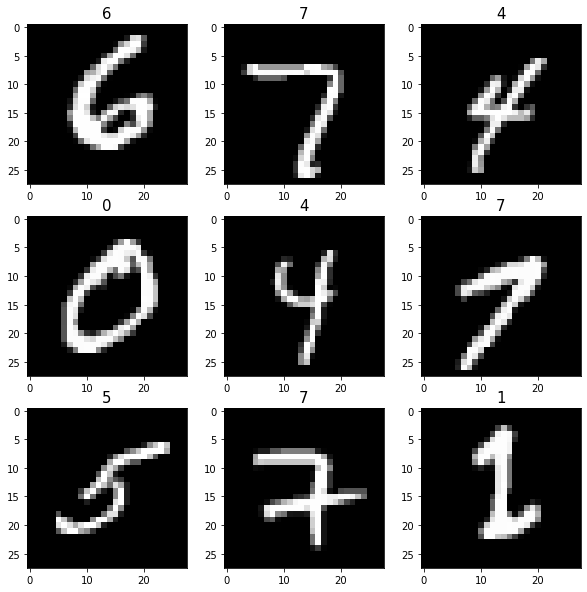

In [48]:
#iterator 
train_ds_iter = iter(train_ds)
images,labels = next(train_ds_iter)

#axes 는 numpy array
#axes.flat는 2D인 axes numpy array를 flat하게 만들어 1-D iterator 를 만들어줌 
fig, axes = plt.subplots(3,3, figsize= (10,10))
for ax_idx, ax in enumerate(axes.flat):
    image = images[ax_idx,...]
    label = labels[ax_idx]
    
    ax.imshow(image, "gray")
    ax.set_title(label.numpy(), fontsize = 15. )